# EDS-TEM quantification of core shell nanoparticles
## Modified for NanoDTC Multidimensional Data Analysis Practical


Using machine learning methods, such as independent component analysis (ICA), the composition of embedded nanostructures, such as core-shell nanoparticles, can be accurately measured as demonstrated by D. Roussow et al., Nano Letters, 2015 (see the [full article](https://www.repository.cam.ac.uk/bitstream/handle/1810/248102/Roussouw%20et%20al%202015%20Nano%20Letters.pdf?sequence=1)). Using the same data, this notebook reproduces the main results of this article.


## Author

* 13/04/2015 Pierre Burdet - Developed for HyperSpy workshop at University of Cambridge

## Changes

* 09/11/2018 Jędrzej Morzy. Adapted for NanoDTC practical purposes.
* 29/05/2016 Duncan Johnstone. Update the syntax for HyperSpy 0.8.5 (Python 3 compatibility)
* 03/08/2016 Francisco de la Peña. Update the syntax for HyperSpy 1.1
* 06/08/2016 Francisco de la Peña. Update the syntax for HyperSpy 0.8.1
* 27/08/2016 Pierre Burdet. Update for workshop at EMC Lyon
* 04/04/2018 Joshua Taillon. Bugfix and update for workshop at NIST

## Requirements

* HyperSpy 1.3

## <a id='top'></a> Contents

1. <a href='#dat'> Specimen & Data</a>
2. <a href='#loa'> Loading</a>
3. <a href='#bss'> Blind source separation of core/shell nanoparticles</a>
4. <a href='#bare'> Representative spectrum from bare cores</a>
5. <a href='#com'> Comparison and quantification</a>
6. <a href='#fur'> Going father: Isolating the nanoparticles</a>



# <a id='dat'></a> 1. Introduction

The sample and the data used in this tutorial are described in 
D. Roussow, et al., Nano Letters, In Press (2015) (see the [full article](https://www.repository.cam.ac.uk/bitstream/handle/1810/248102/Roussouw%20et%20al%202015%20Nano%20Letters.pdf?sequence=1)).

FePt@Fe$_3$O$_4$ core-shell nanoparticles are investigated with an EDS/TEM experiment (FEI Osiris TEM, 4 EDS detectors). The composition of the core can be measured with ICA (see figure 1c). To prove the accuracy of the results, measurements on bare FePt bimetallic nanoparticles from a synthesis prior to the shell addition step are used.

<img src="images/core_shell.png" style="height:350px;">
Figure 1: (a) A spectrum image obtained from a cluster of core-shell nanoparticles. (b) The nanoparticles are comprised of a bi-metallic Pt/Fe core surrounded by an iron oxide shell on a carbon support. (c) ICA decomposes the mixed EDX signals into components representing the core (IC#0), shell (IC#1) and support (IC#2).

In [1]:
#Download the data (1MB)
from urllib.request import urlretrieve, urlopen
from zipfile import ZipFile
files = urlretrieve("https://www.dropbox.com/s/ecdlgwxjq04m5mx/HyperSpy_demos_EDS_TEM_files.zip?raw=1", "./HyperSpy_demos_EDX_TEM_files.zip")
with ZipFile("HyperSpy_demos_EDX_TEM_files.zip") as z:
    z.extractall()

## Importing Hyperspy

Import HyperSpy, numpy and matplotlib libraries

In [3]:
%pip install hyperspy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: cloudpickle>=1.1.1 in c:\users\es758\anaconda3\lib\site-packages (from dask[array]>2.1.0->hyperspy) (2.0.0)



In [1]:
%matplotlib qt5
#%matplotlib tk
import hyperspy.api as hs

## <a id='loa'></a> Loading data set

<a href='#top'> Table of contents</a>

Load the spectrum images of the bare seeds and the core shell nanoparticles.

In [2]:
c = hs.load('bare_core.hdf5')
cs = hs.load('core_shell.hdf5')

What kind of an object is 'c'?

In [4]:
c

<EDSTEMSpectrum, title: Bare core, dimensions: (84, 84|992)>

In [5]:
c.axes_manager

<Axes manager, axes: (84, 84|992)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |     84 |      0 |       0 |     0.5 |     nm 
               y |     84 |      0 |       0 |     0.5 |     nm 
---------------- | ------ | ------ | ------- | ------- | ------ 
          Energy |    992 |        |    0.16 |    0.02 |    keV

Inspect the metadata

In [6]:
c.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   └── tilt_alpha = 0.0
│       ├── acquisition_mode = STEM
│       ├── beam_energy = 200.0
│       └── microscope = Microscope TecnaiOsiris 200 kV D658 AnalyticalTwin
├── General
│   ├── date = 14.10.2014
│   └── title = Bare core
├── Sample
│   ├── elements = array(['Fe', 'Pt'], dtype='<U2')
│   └── xray_lines = array(['Fe_Ka', 'Pt_La'], dtype='<U5')
└── Signal
    ├── binned = True
    ├── signal_origin = 
    └── signal_type = EDS_TEM

#### Very useful tip: "Autocompletion"

In fact, long commands like the previous one can be entered more quickly using the ``tab`` key. Just enter the first few letters of the command, press ``tab`` and a list of the possible commands will appear. Navigate to the required command with the arrow keys (you still need the brackets at the end). If you are in interactive mode, try it in the cell below:

In [ ]:
c.origi

The metadata can be easily modified if needed:

In [30]:
c.metadata.Acquisition_instrument.TEM.microscope = 'FEI TecnaiOsiris 200 kV D658 AnalyticalTwin'

Plot the signal

<IPython.core.display.Javascript object>


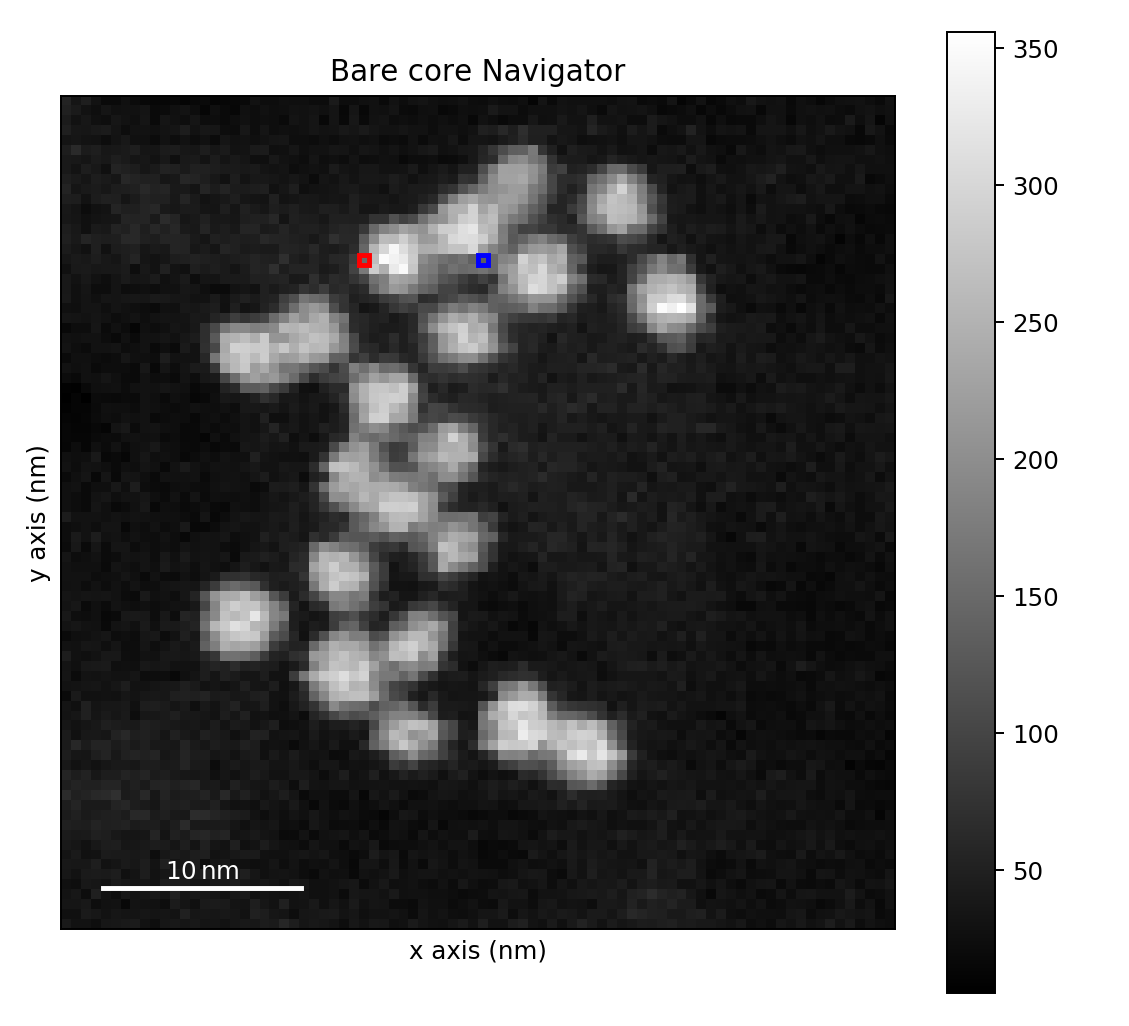

<IPython.core.display.Javascript object>


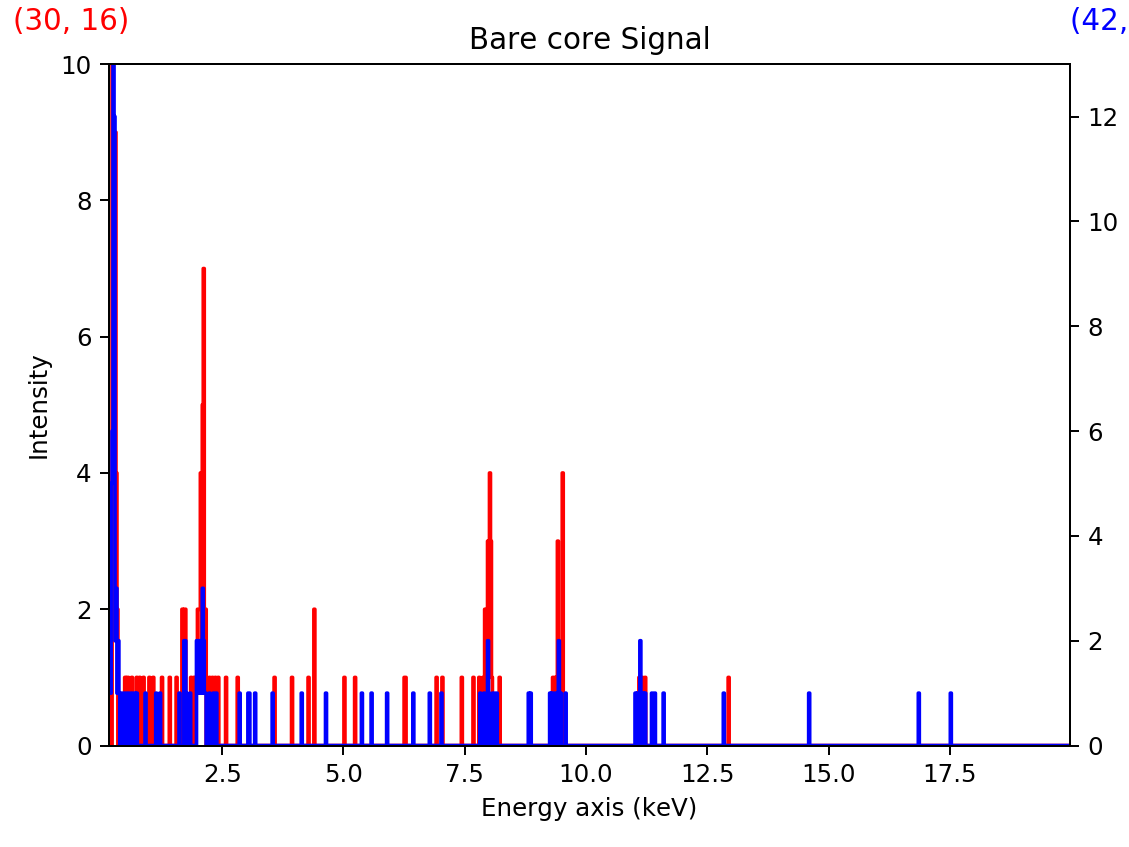

In [7]:
c.plot()

#### Moving around:
* to move around you can either drag the marker with your mouse or use arrow keys
* press e to add a second marker
* press + or - keys to increase and decrease the size of the marker
* press h to adjust image contrast

If in doubt, there is a lot of documentation online: http://hyperspy.org/hyperspy-doc/current/index.html or you can access help directly from here through:

In [14]:
help(c.plot)

Help on method plot in module hyperspy._signals.eds:

plot(xray_lines=False, only_lines=('a', 'b'), only_one=False, background_windows=None, integration_windows=None, **kwargs) method of hyperspy._signals.eds_tem.EDSTEMSpectrum instance
    Plot the EDS spectrum. The following markers can be added
    
    - The position of the X-ray lines and their names.
    - The background windows associated with each X-ray lines. A black line
    links the left and right window with the average value in each window.
    
    Parameters
    ----------
    xray_lines: {False, True, 'from_elements', list of string}
        If not False, indicate the position and the name of the X-ray
        lines.
        If True, if `metadata.Sample.elements.xray_lines` contains a
        list of lines use those. If `metadata.Sample.elements.xray_lines`
        is undefined or empty or if xray_lines equals 'from_elements' and
        `metadata.Sample.elements` is defined, use the same syntax as
        `add_line` t

In [15]:
c.plot?

### Indexing and accessing data

It is sometimes useful to extract a single spectrum from the spectrum-image, which you can do through indexing:

<IPython.core.display.Javascript object>


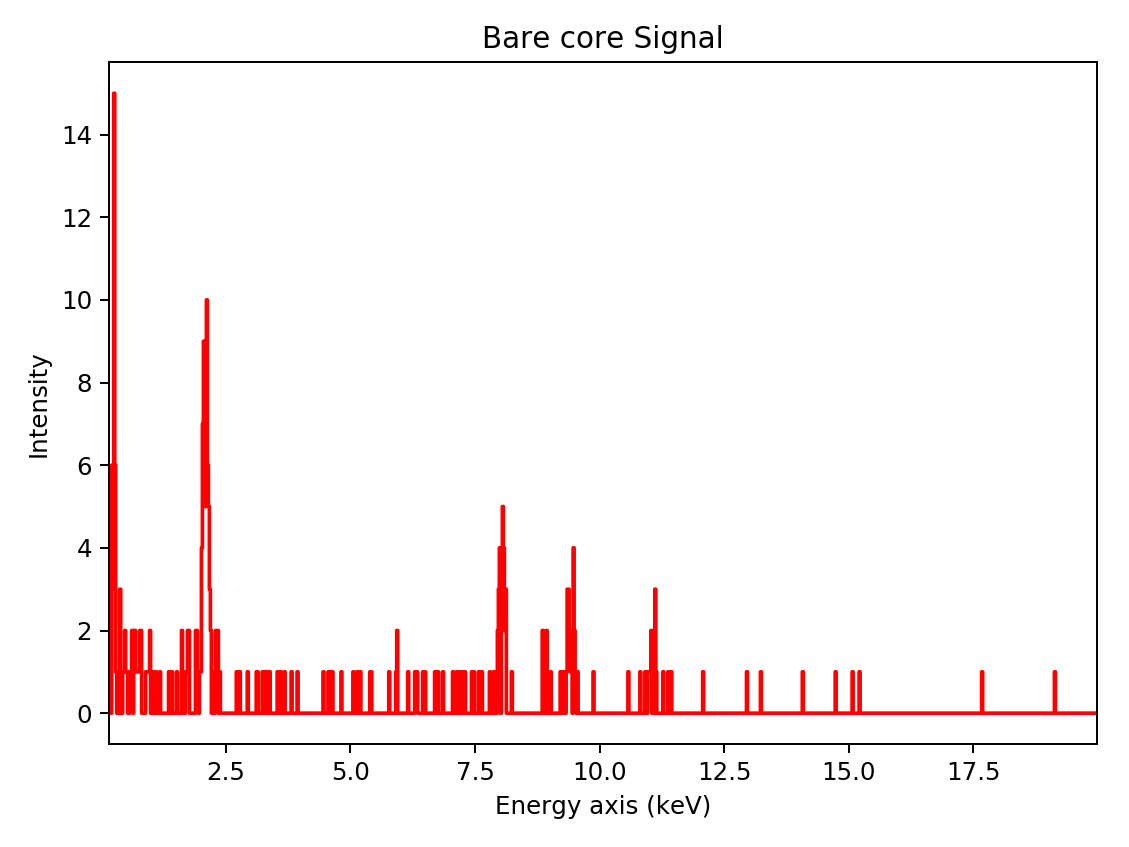

In [8]:
c.inav[32,30].plot()

In [9]:
c.inav[32,30].data

array([ 2,  1,  0,  6,  3, 15,  6,  1,  0,  0,  0,  3,  0,  0,  1,  1,  2,
        1,  1,  0,  0,  1,  1,  2,  0,  2,  2,  1,  1,  1,  1,  2,  2,  0,
        0,  0,  0,  1,  1,  1,  1,  2,  0,  0,  1,  0,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  2,  1,  0,  0,  1,  1,  2,  2,  0,  0,  0,  0,
        0,  0,  2,  2,  1,  0,  1,  1,  4,  7,  9,  8,  5, 10,  6,  5,  3,
        2,  0,  0,  1,  0,  2,  1,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
        0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  1,  1,  0

We can sum spectra from the whole spectrum image:

<IPython.core.display.Javascript object>


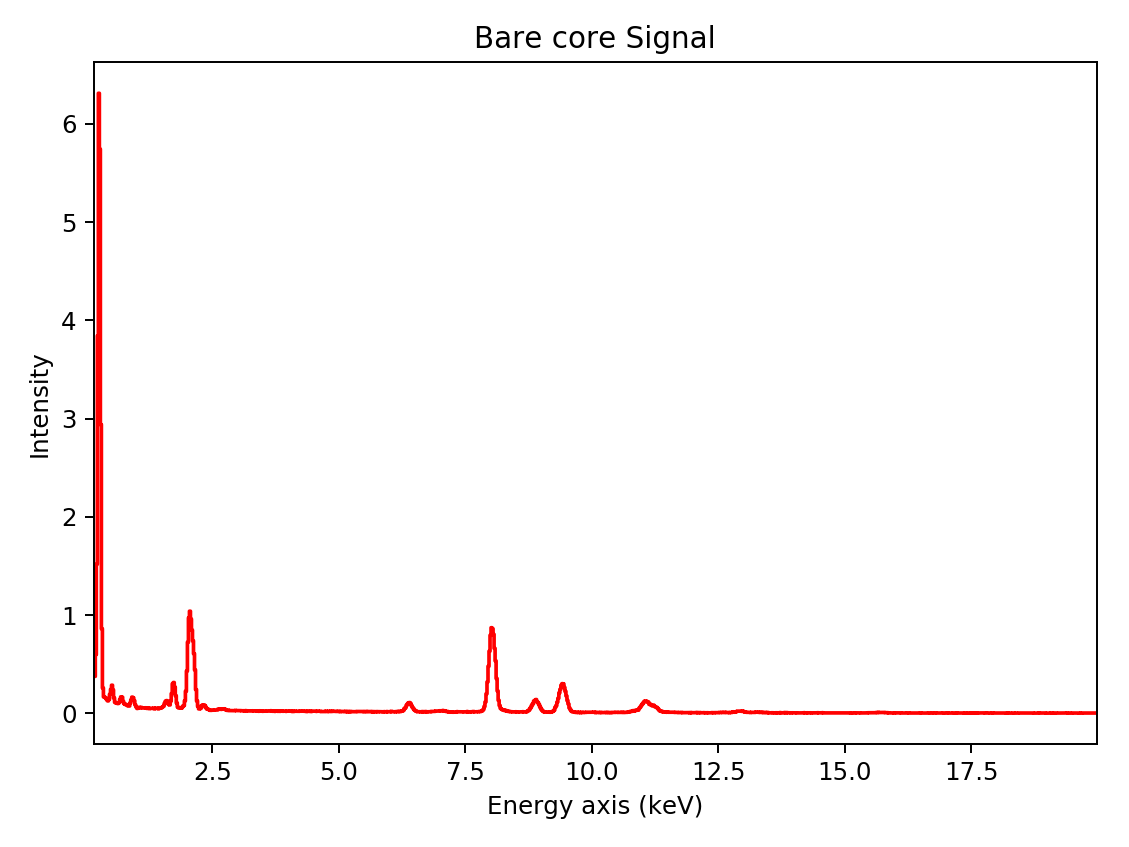

In [10]:
mean_spectrum = c.mean()
mean_spectrum.plot()

Or from a region of it: (we can also specify markers and regions of interest or work on the spectra as normal numpy arrays)

<IPython.core.display.Javascript object>


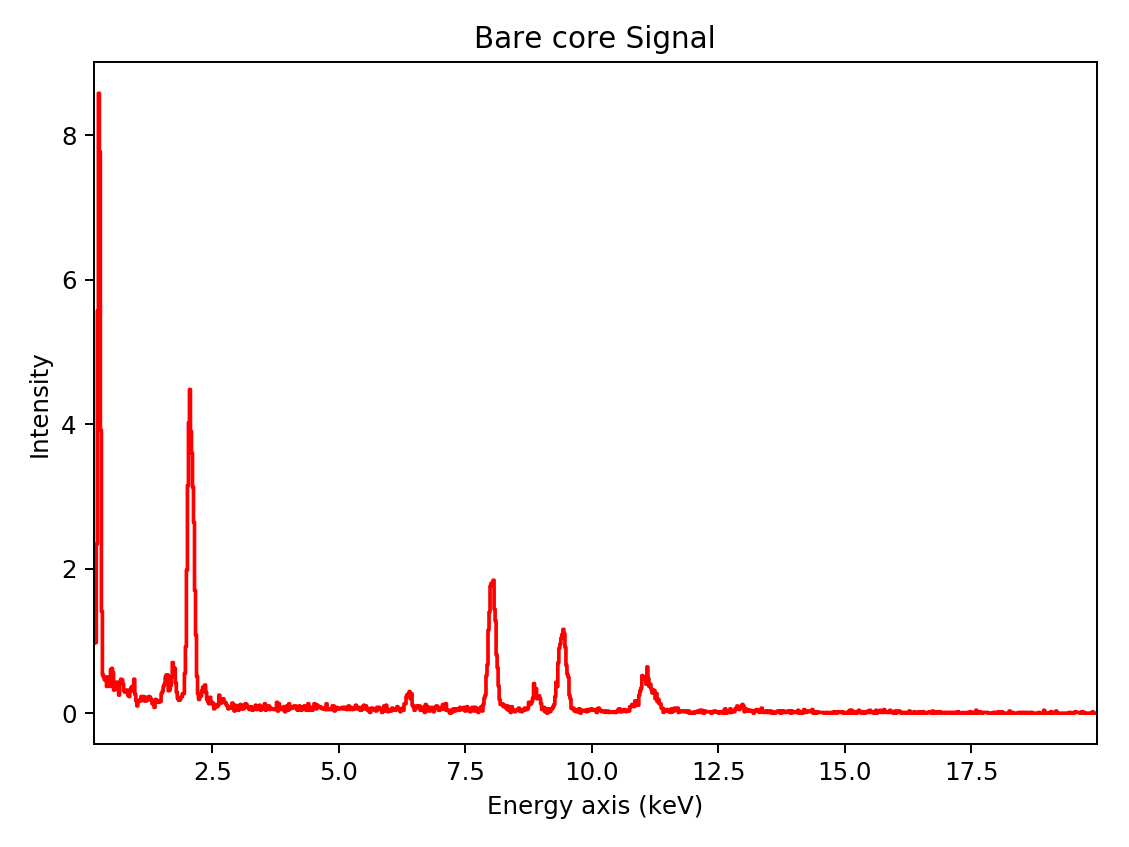

In [13]:
mean_spectrum_2 = c.inav[20:30,20:30].mean()
mean_spectrum_2.plot()

<IPython.core.display.Javascript object>


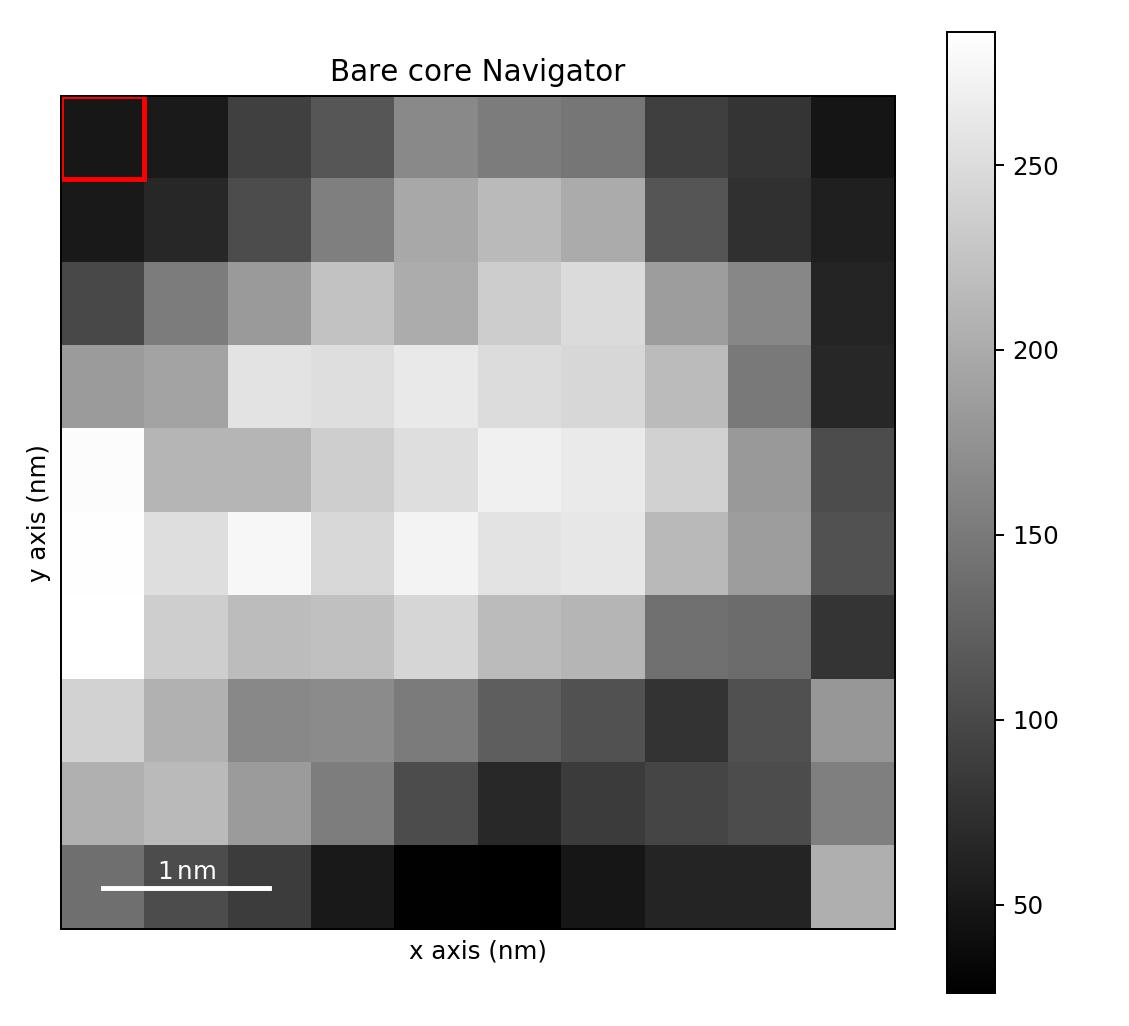

<IPython.core.display.Javascript object>


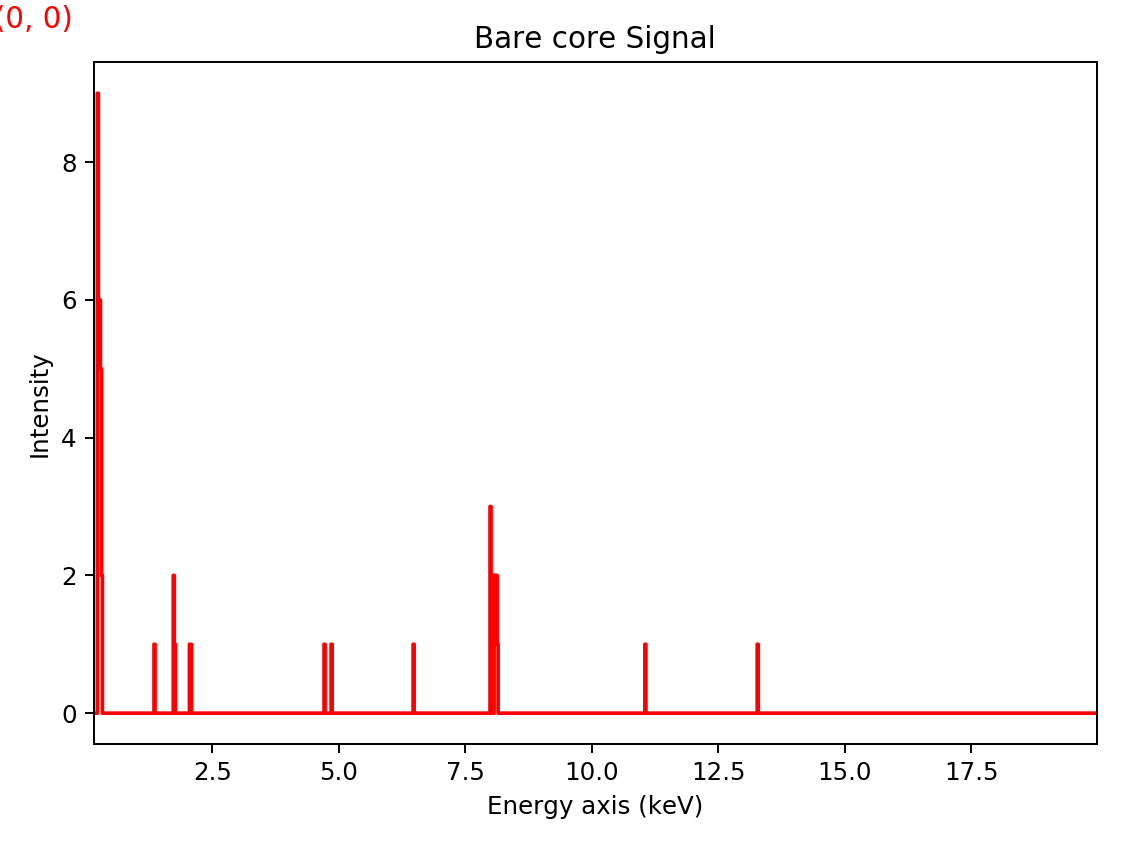

In [12]:
c.inav[20:30,20:30].plot()

### Inspecting the data

Plot the intensity of Fe K${\alpha}$ and Pt L${\alpha}$. (in the metadata, the elements are X-ray lines are already set, which may not always be the case)

In [21]:
cs.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   └── tilt_alpha = 0.0
│       ├── acquisition_mode = STEM
│       ├── beam_energy = 200.0
│       └── microscope = Microscope TecnaiOsiris 200 kV D658 AnalyticalTwin
├── General
│   ├── date = 14.10.2014
│   └── title = Core shell
├── Sample
│   ├── elements = array(['Fe', 'Pt'], dtype='<U2')
│   └── xray_lines = array(['Fe_Ka', 'Pt_La'], dtype='<U5')
└── Signal
    ├── binned = True
    ├── signal_origin = 
    └── signal_type = EDS_TEM

<IPython.core.display.Javascript object>


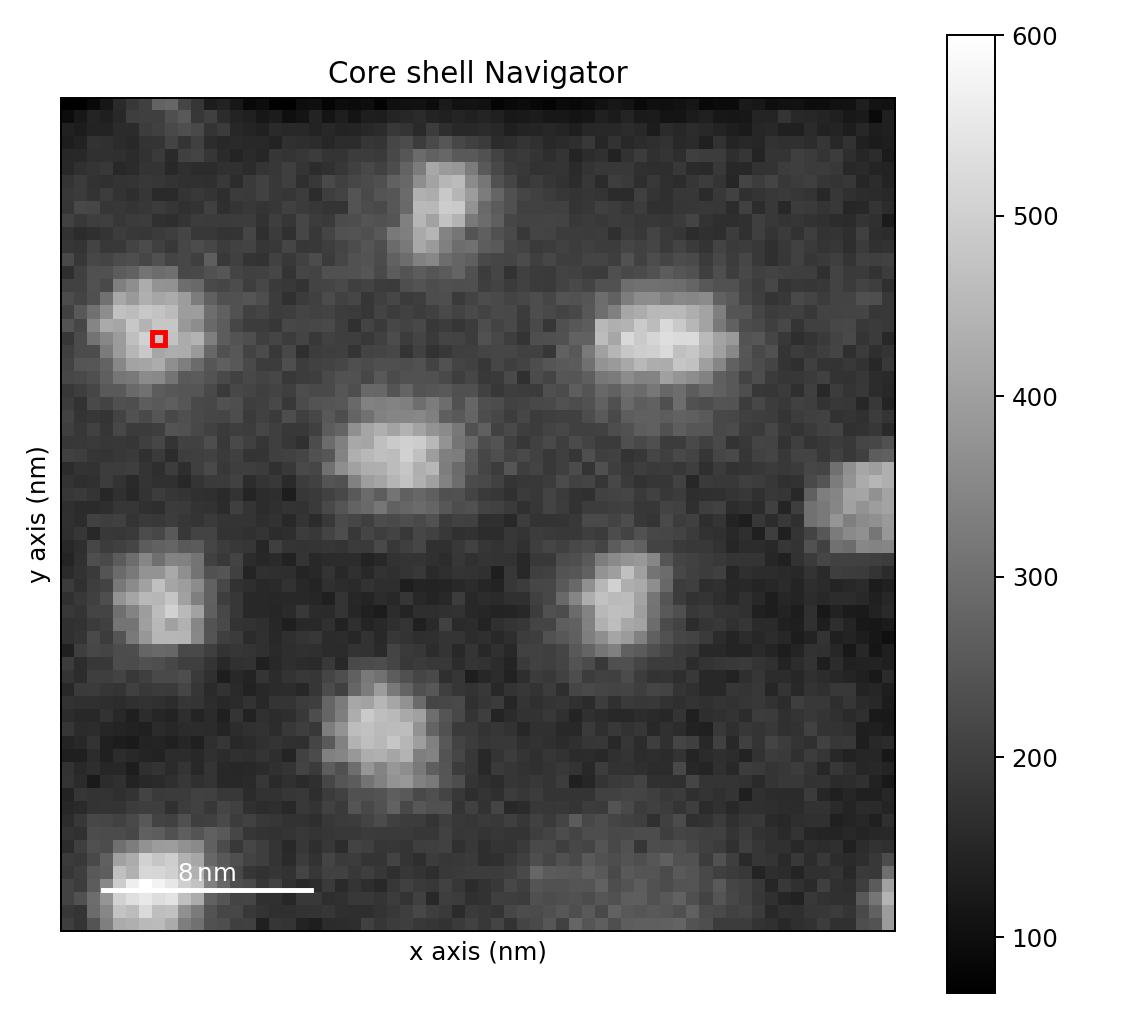

<IPython.core.display.Javascript object>


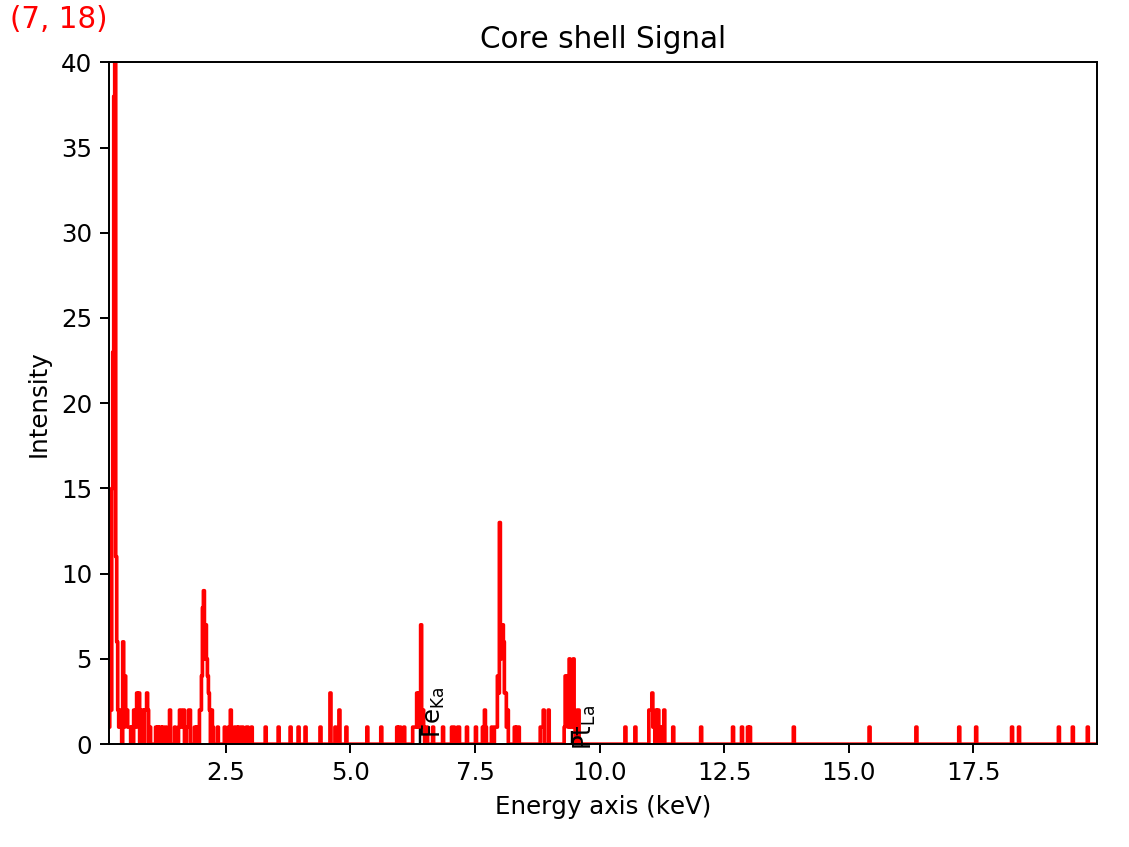

In [20]:
cs.plot(xray_lines=True)

<IPython.core.display.Javascript object>


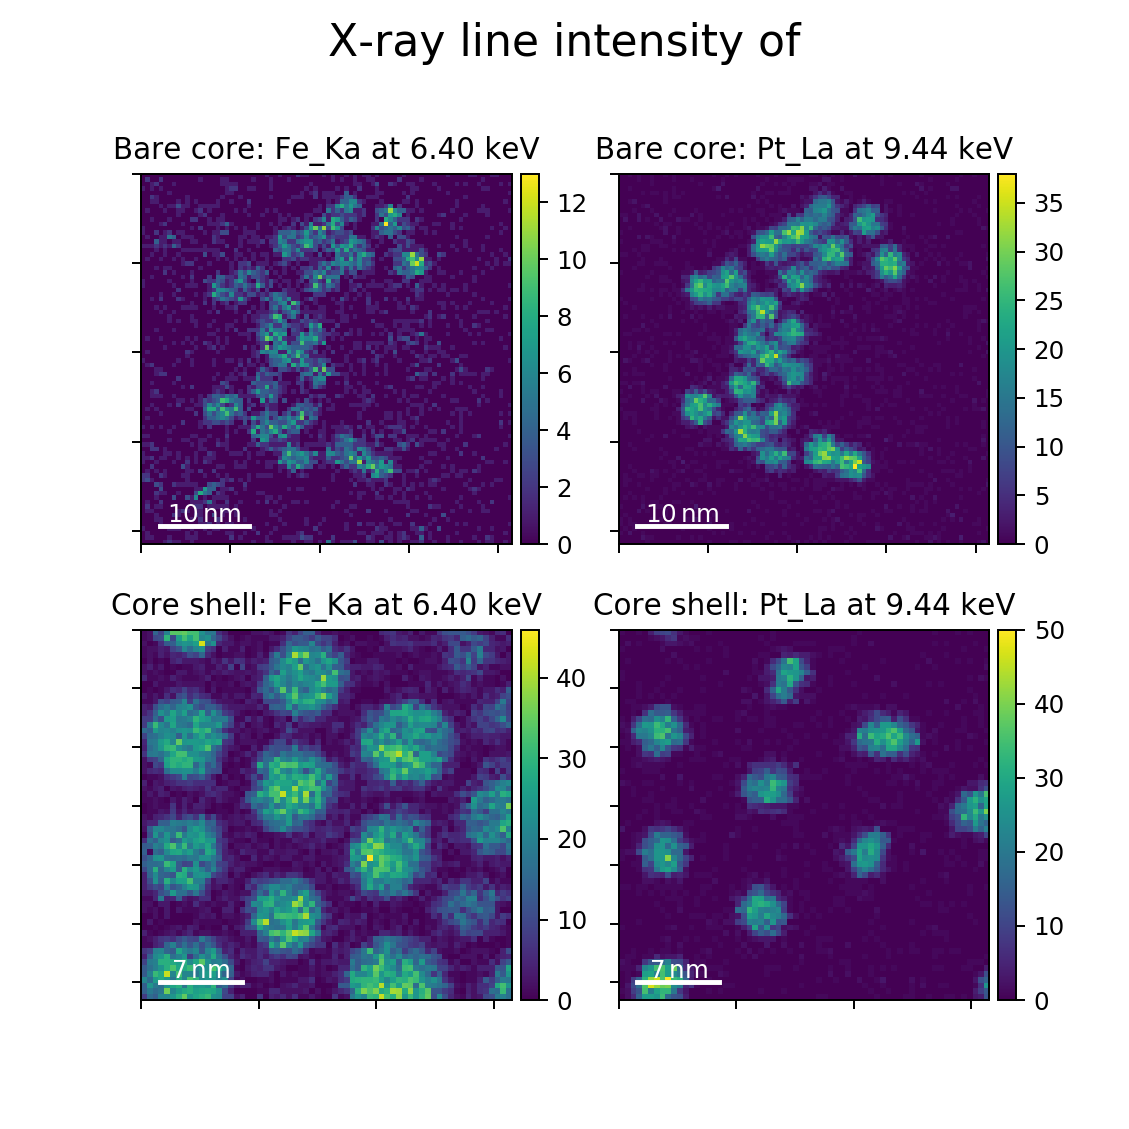

In [14]:
axes = hs.plot.plot_images(hs.transpose(*(c.get_lines_intensity() + cs.get_lines_intensity())),
                           scalebar='all', axes_decor=None, per_row=2, cmap='viridis')

In [22]:
cs.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   └── tilt_alpha = 0.0
│       ├── acquisition_mode = STEM
│       ├── beam_energy = 200.0
│       └── microscope = Microscope TecnaiOsiris 200 kV D658 AnalyticalTwin
├── General
│   ├── date = 14.10.2014
│   └── title = Core shell
├── Sample
│   ├── elements = array(['Fe', 'Pt'], dtype='<U2')
│   └── xray_lines = array(['Fe_Ka', 'Pt_La'], dtype='<U5')
└── Signal
    ├── binned = True
    ├── signal_origin = 
    └── signal_type = EDS_TEM

In [33]:
c.set_lines(['Fe_Ka','Pt_La'])

## <a id='bss'></a> 3. Blind source separation of core/shell nanoparticles

<a href='#top'> Table of contents</a>

Apply blind source separation (ICA) to obtain a factor (spectrum) corresponding to the core.

In [34]:
cs.change_dtype('float')
cs.decomposition()

<IPython.core.display.Javascript object>


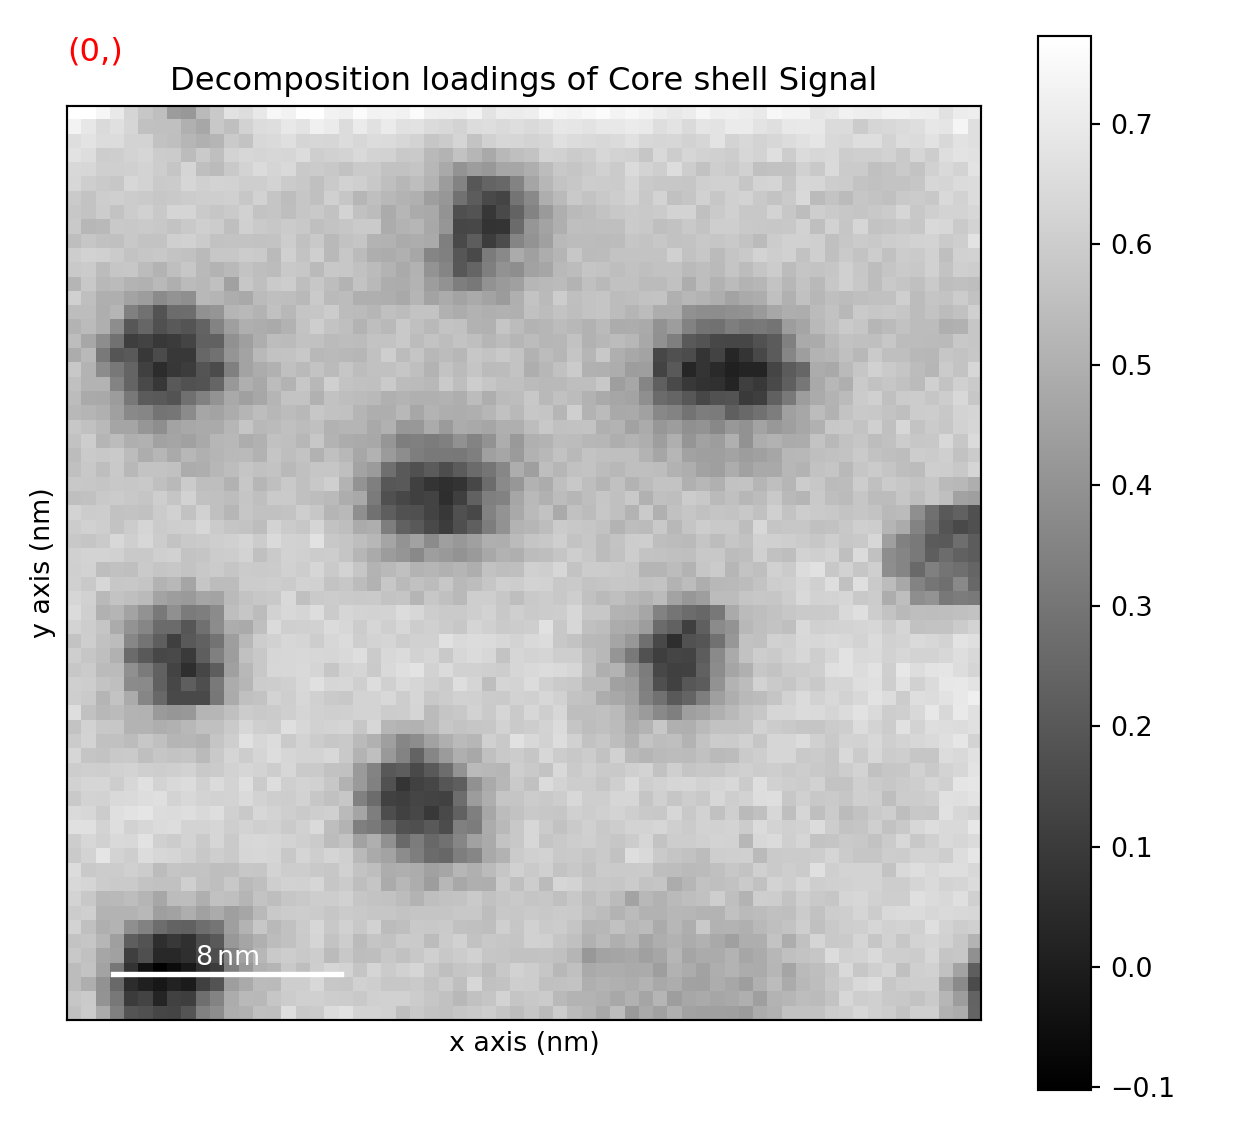

<IPython.core.display.Javascript object>


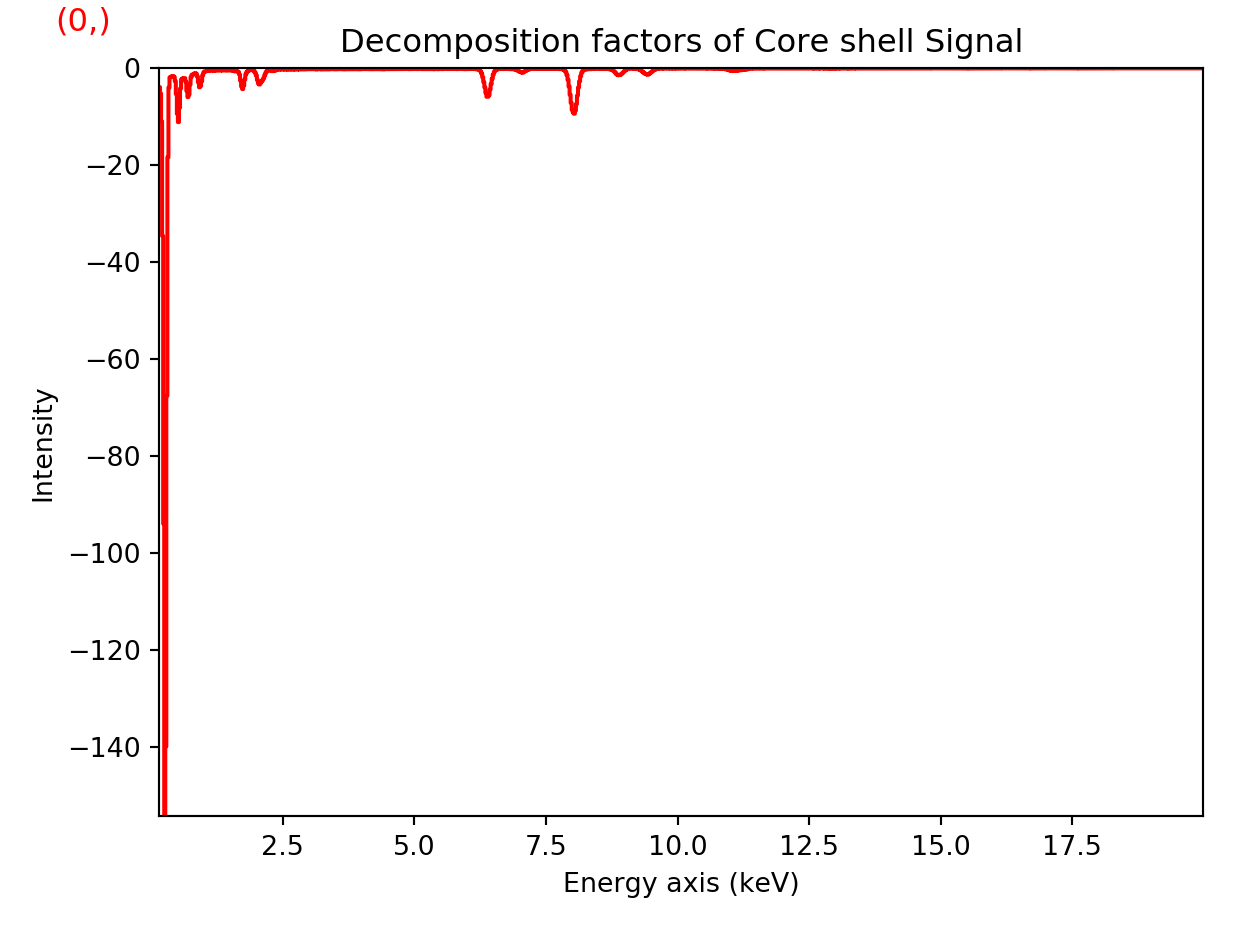

In [40]:
cs.plot_decomposition_results()

<IPython.core.display.Javascript object>


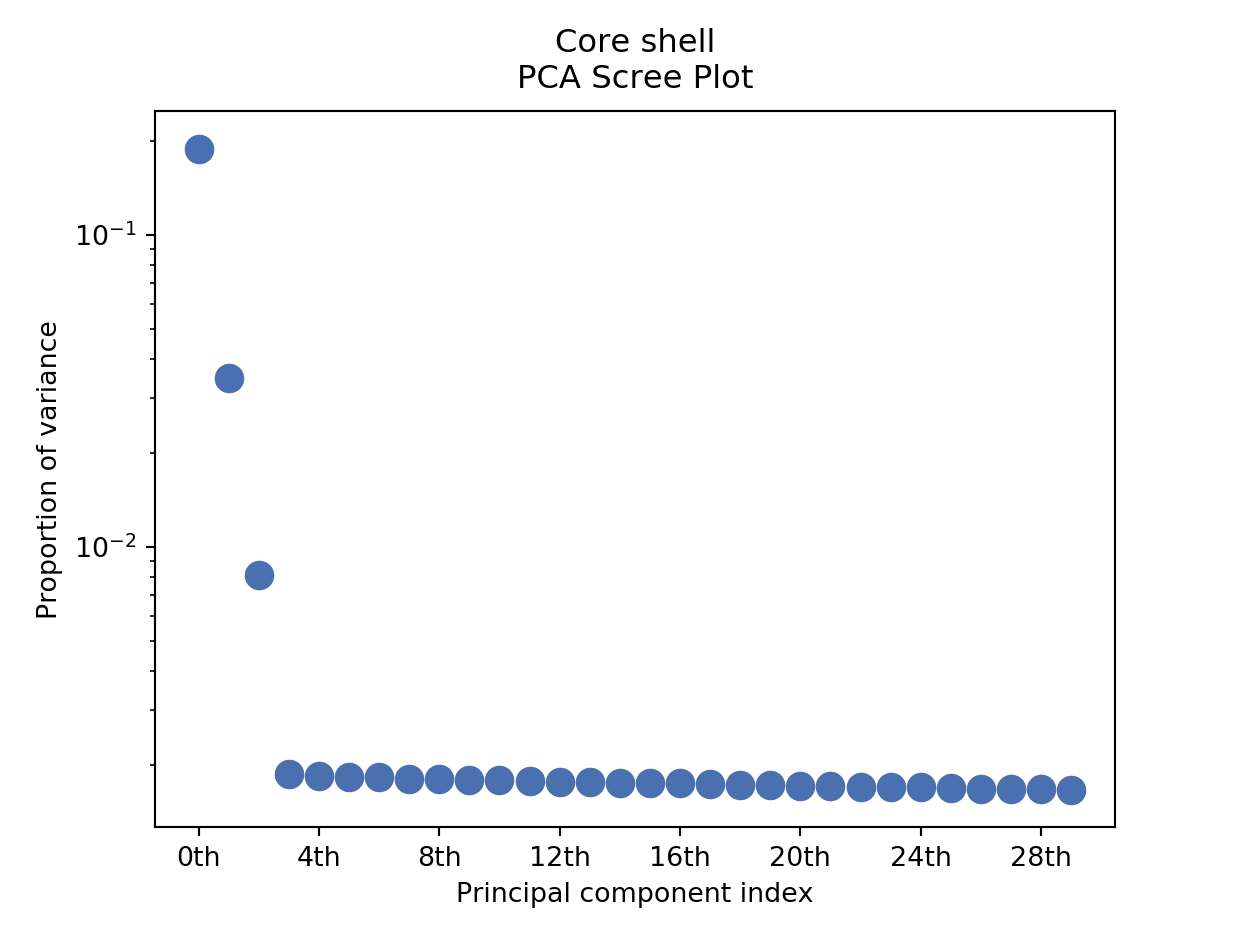

In [35]:
ax = cs.plot_explained_variance_ratio()

ICA on the three first components.

In [36]:
cs.blind_source_separation(3)

<IPython.core.display.Javascript object>


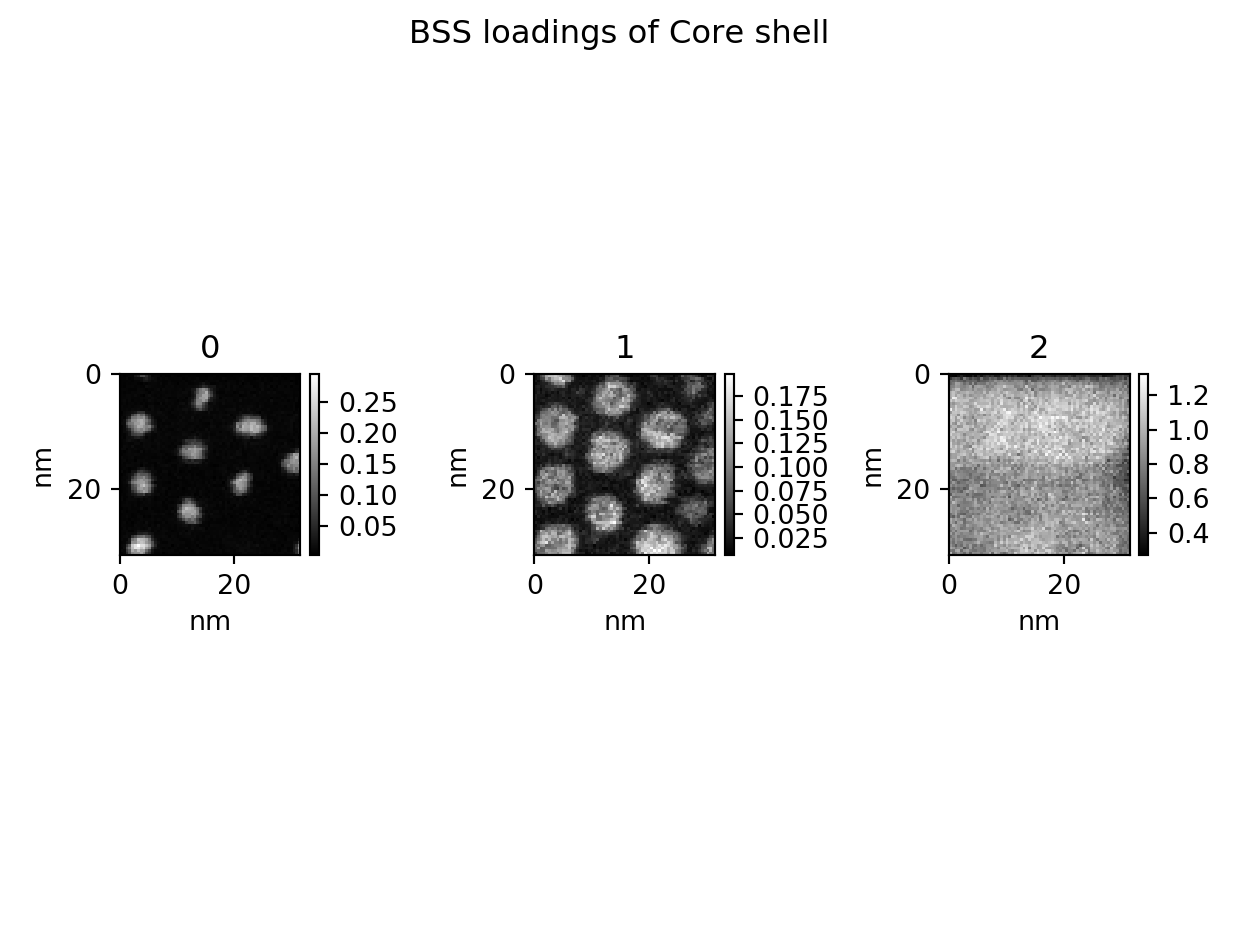

In [37]:
axes = cs.plot_bss_loadings()

<IPython.core.display.Javascript object>


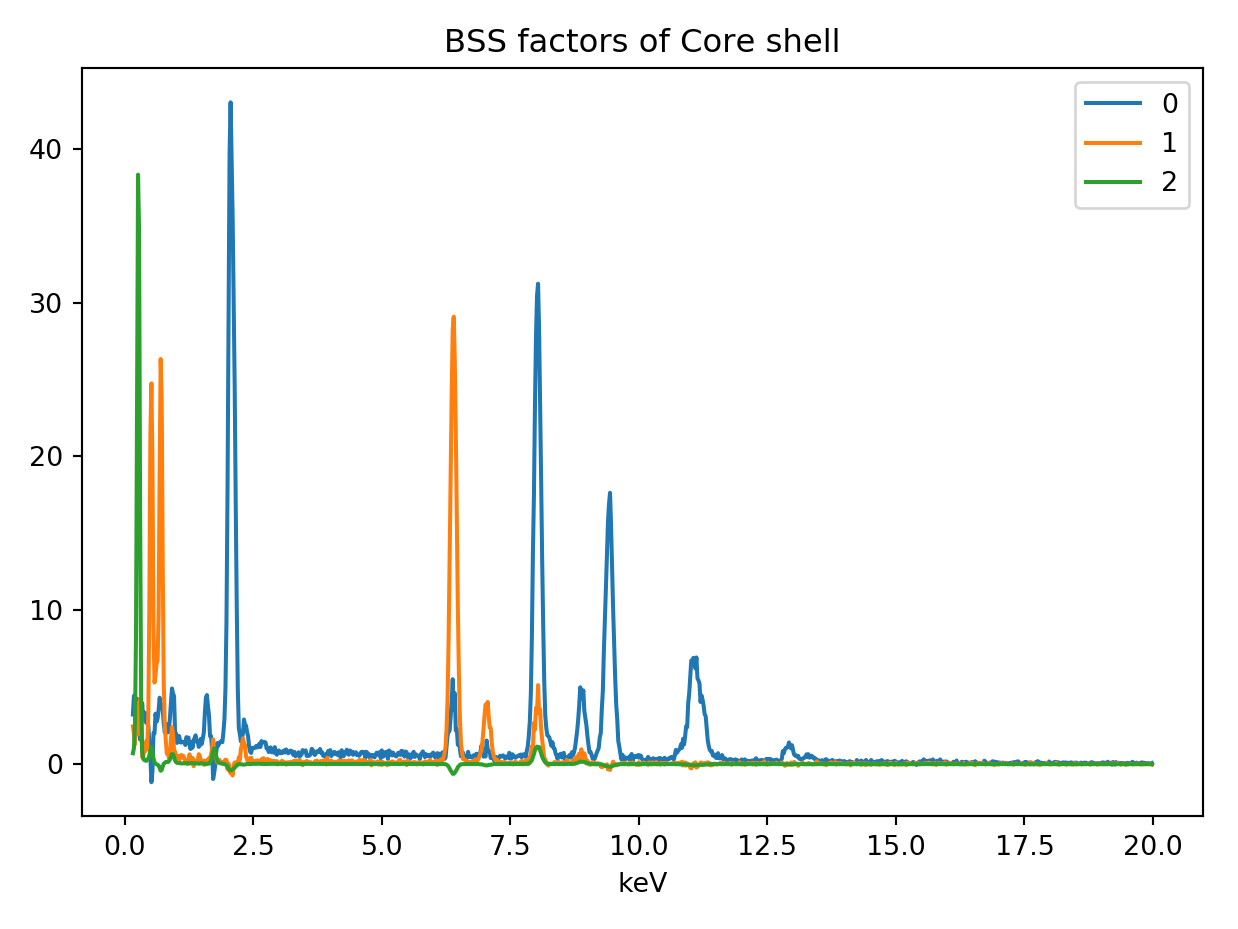

In [38]:
axes = cs.plot_bss_factors()

The first component corresponds to the core.

In [46]:
s_bss = cs.get_bss_factors().inav[0]

<IPython.core.display.Javascript object>


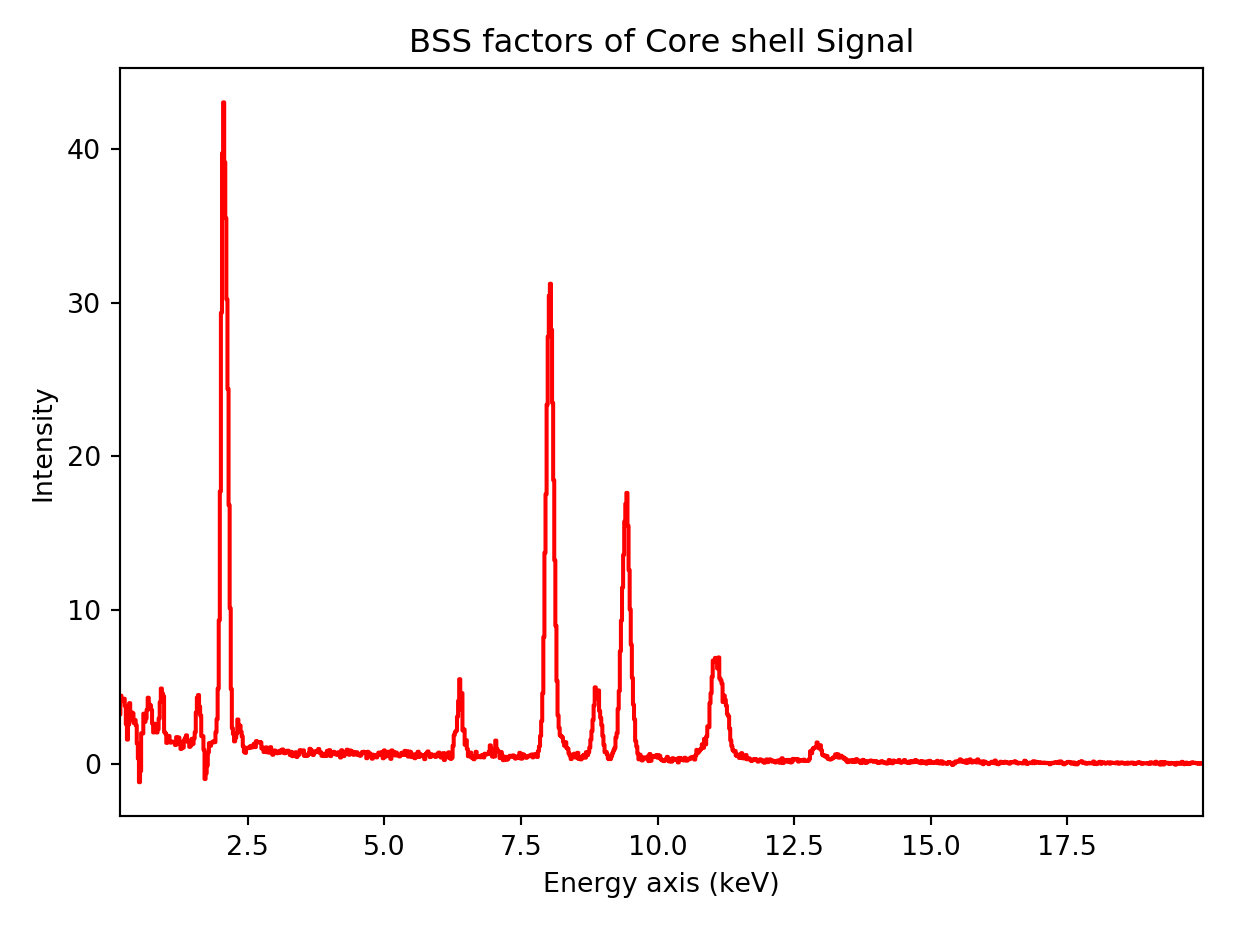

In [47]:
s_bss.plot()

## <a id='bare'></a> 4. Representative spectrum from bare cores

<a href='#top'> Table of contents</a>

To obtain a representative spectrum of the bare nanoparticles, the low intensity of Pt L${\alpha}$ is masked.

In [61]:
pt_la = c.get_lines_intensity(['Pt_La'])[0]
mask = pt_la > 6

<IPython.core.display.Javascript object>


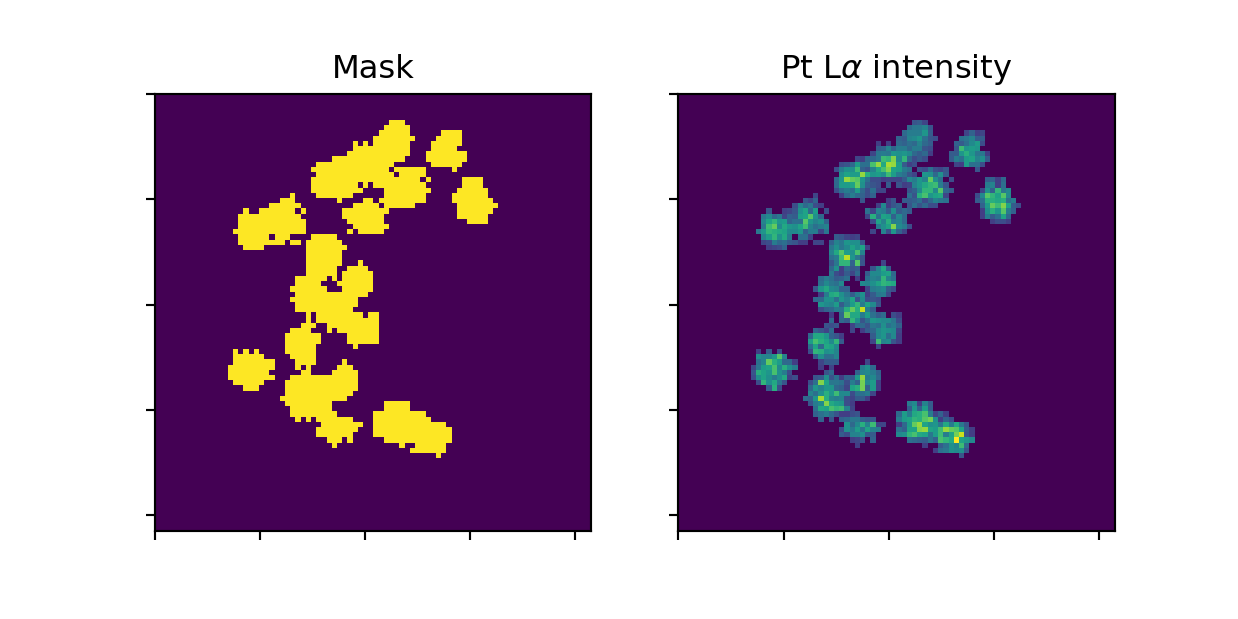

In [49]:
axes = hs.plot.plot_images(hs.transpose(*(mask, pt_la * mask)), axes_decor=None, colorbar=None,
                           label=['Mask', 'Pt L${\\alpha}$ intensity'], cmap='viridis')

To apply the mask, the navigation dimensions of the mask must be manipulated to match the navigation dimensions of the EDS spectrum image. This is achieved crudely via first generating a mask using the built in vacuum_mask() method and then overwriting the data with the mask generated above.

In [62]:
c_mask = c.sum(-1)
c_mask.data = mask.data

The sum over the particles is used as a bare core spectrum.

In [68]:
s_bare = (c * c_mask).sum()

<IPython.core.display.Javascript object>


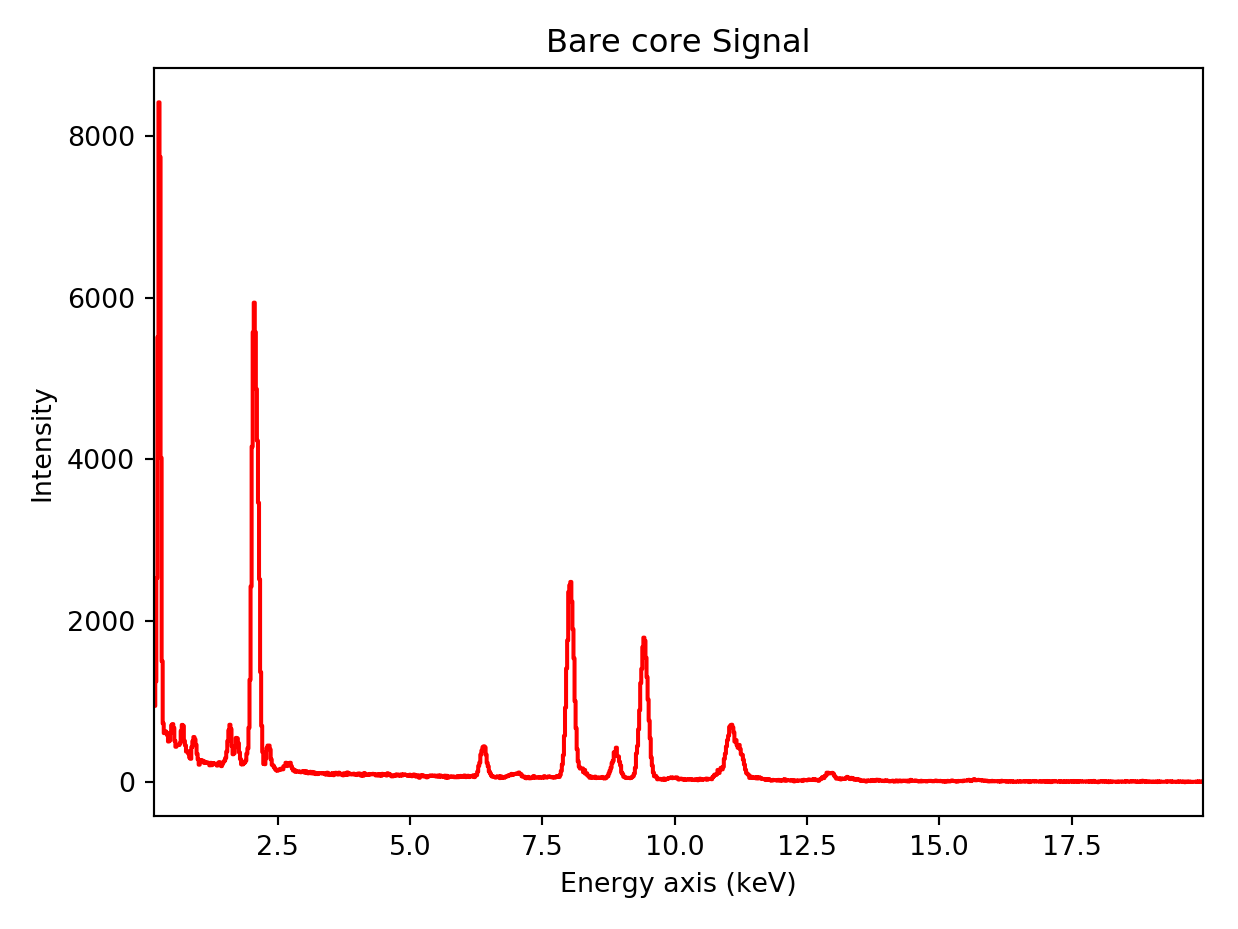

In [70]:
s_bare.plot()

## <a id='com'></a> 5. Comparison and quantification

<a href='#top'> Table of contents</a>

Stack together the spectrum of bare particles and the first ICA component.

In [71]:
s_bare.change_dtype('float')
s = hs.stack([s_bare, s_bss], new_axis_name='Bare or BSS')
s.metadata.General.title = 'Bare or BSS'

<IPython.core.display.Javascript object>


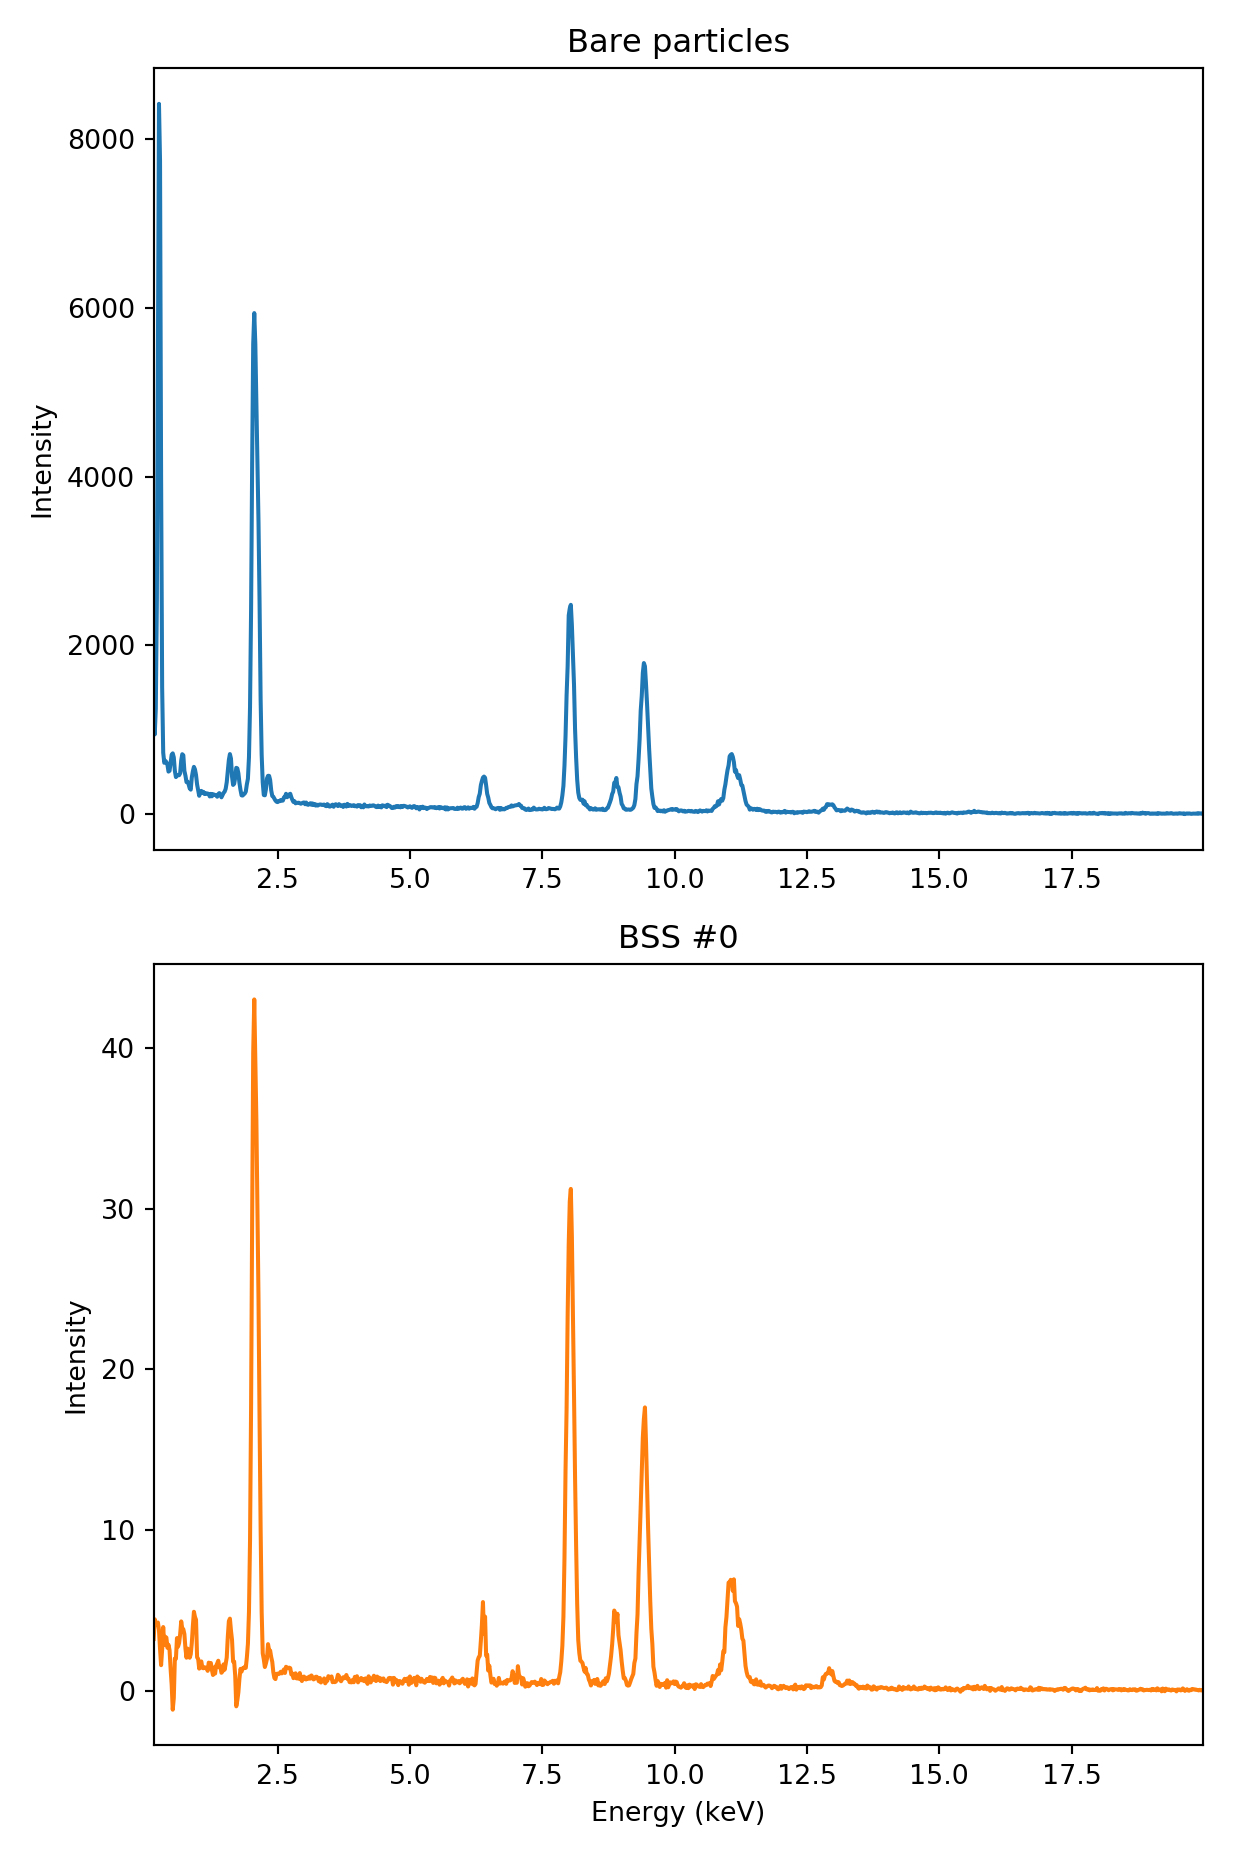

In [72]:
axes = hs.plot.plot_spectra(s, style='mosaic', legend=['Bare particles', 'BSS #0'])

### Method 1

X-ray intensities measurement with background subtraction.

In [73]:
w = s.estimate_background_windows()

<IPython.core.display.Javascript object>


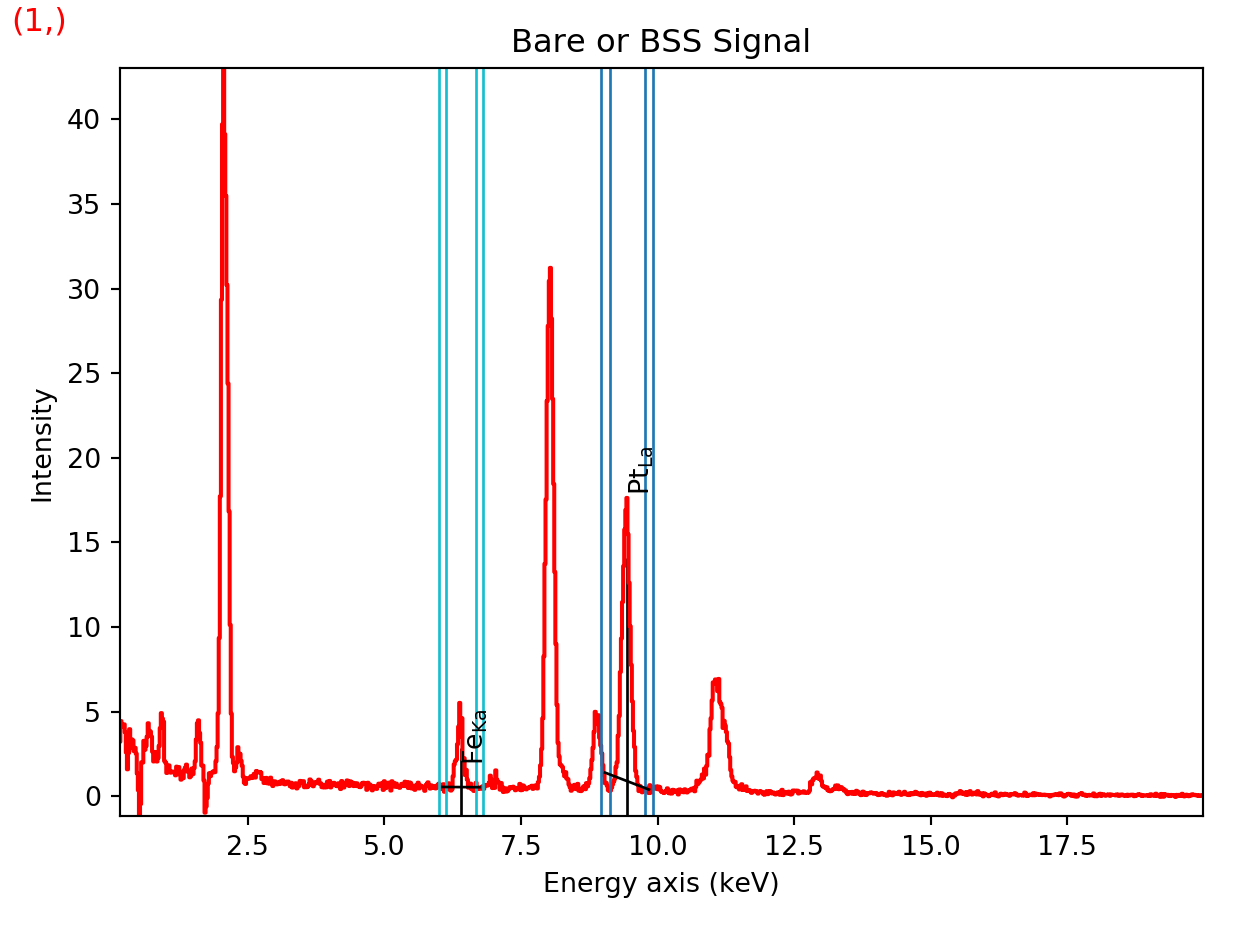

In [74]:
s.plot(background_windows=w, navigator='slider')

Refinement of the windows position.

In [75]:
w

array([[5.99958948, 6.13435965, 6.67344035, 6.80821052],
       [8.96061636, 9.1211109 , 9.7630891 , 9.92358364]])

In [76]:
w[1, 0] = 8.44
w[1, 1] = 8.65

<IPython.core.display.Javascript object>


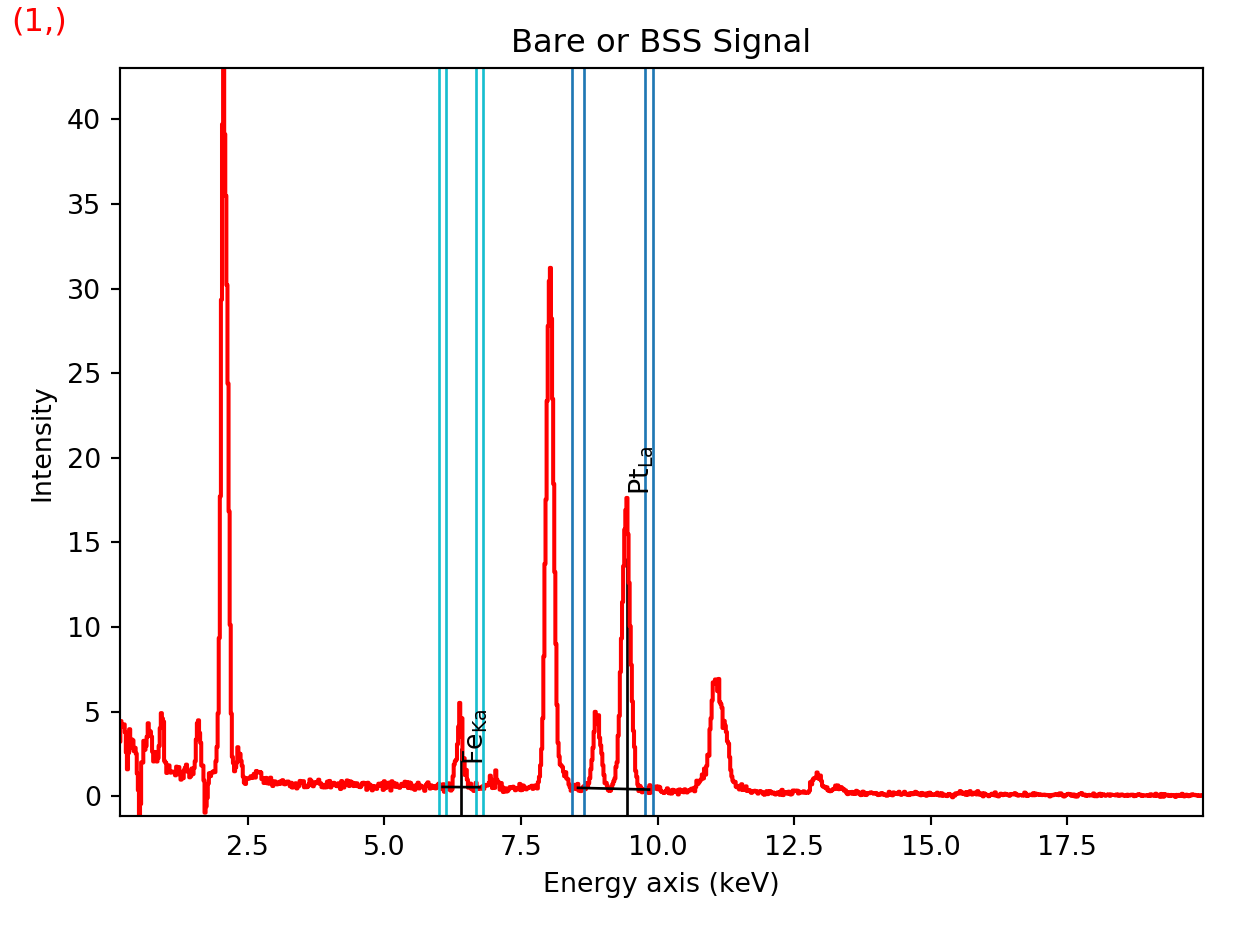

In [77]:
s.plot(background_windows=w, navigator='slider')

In [78]:
sI = s.get_lines_intensity(background_windows=w)

In [79]:
print('Bare core Fe_Ka/Pt_La ratio: \t{:.2f}'.format(list(sI[0].inav[0].data / sI[1].inav[0].data)[0]))
print('BSS Fe_Ka/Pt_La ratio: \t\t{:.2f}'.format(list(sI[0].inav[1].data / sI[1].inav[1].data)[0]))

Bare core Fe_Ka/Pt_La ratio: 	0.18
BSS Fe_Ka/Pt_La ratio: 		0.19


### Method 2

Measure X-ray intensity by fitting a Gaussian model

In [80]:
m = s.isig[5.:15.].create_model()

In [84]:
m.add_family_lines(['Cu_Ka', 'Co_Ka'])

AttributeError: 'EDSTEMModel' object has no attribute 'metadata'

In [82]:
m.components

   # |      Attribute Name |      Component Name |      Component Type
---- | ------------------- | ------------------- | -------------------
   0 |  background_order_6 |  background_order_6 |          Polynomial
   1 |               Fe_Ka |               Fe_Ka |            Gaussian
   2 |               Fe_Kb |               Fe_Kb |            Gaussian
   3 |               Pt_La |               Pt_La |            Gaussian
   4 |              Pt_Lb1 |              Pt_Lb1 |            Gaussian
   5 |              Pt_Lb4 |              Pt_Lb4 |            Gaussian
   6 |               Pt_Ln |               Pt_Ln |            Gaussian
   7 |               Pt_Ll |               Pt_Ll |            Gaussian
   8 |              Pt_Lb2 |              Pt_Lb2 |            Gaussian
   9 |              Pt_Lb3 |              Pt_Lb3 |            Gaussian
  10 |              Pt_Lg3 |              Pt_Lg3 |            Gaussian
  11 |              Pt_Lg1 |              Pt_Lg1 |            Gaussian
  12 |

<IPython.core.display.Javascript object>


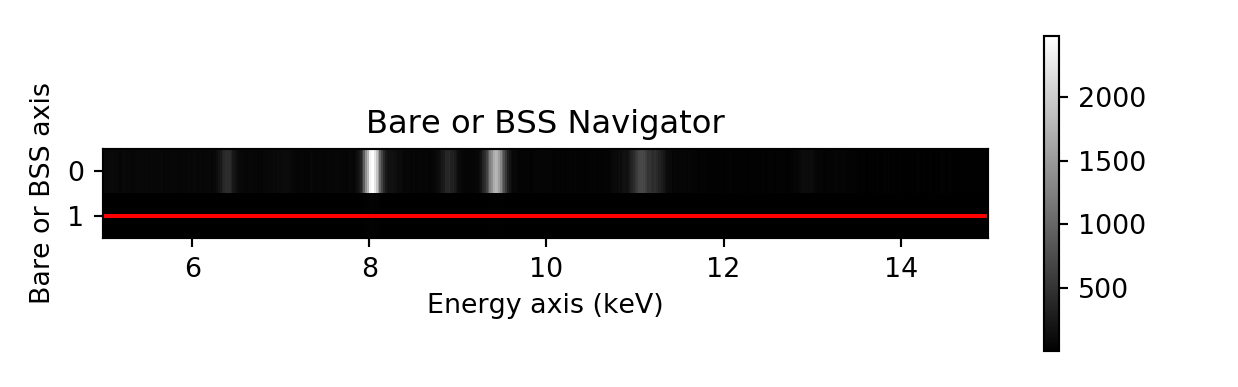

<IPython.core.display.Javascript object>


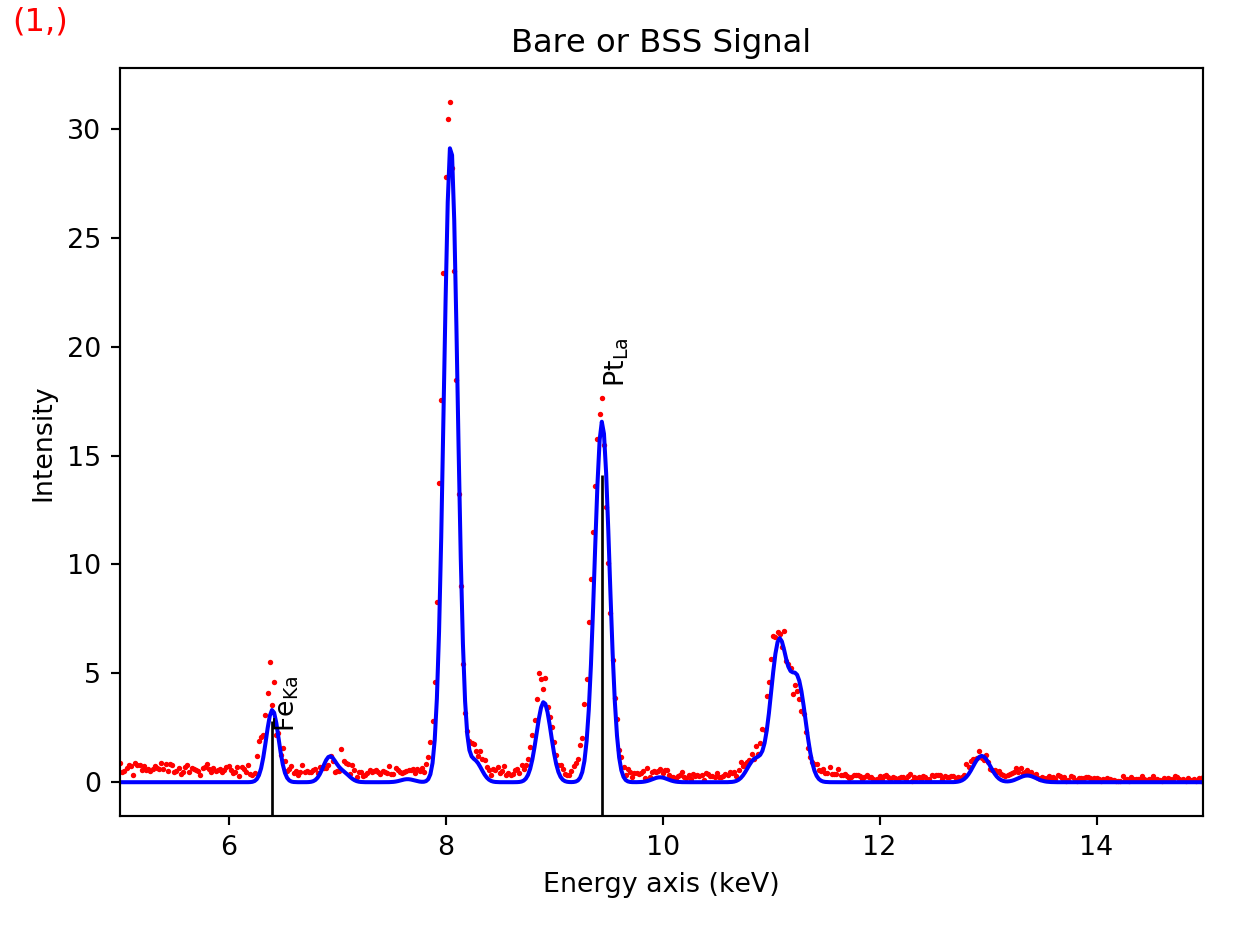

In [85]:
m.plot(xray_lines=True)

In [ ]:
m.multifit()

In [ ]:
m.fit_background()

In [ ]:
m.calibrate_energy_axis()

In [ ]:
m.plot()

In [ ]:
sI = m.get_lines_intensity()[:2]
sI

Set up the kfactors for Fe K${\alpha}$ and Pt L${\alpha}$.

In [ ]:
#From Brucker software (Esprit)
kfactors = [1.450226, 5.075602]

Quantify with Cliff Lorimer.

In [ ]:
composition = s.quantification(method="CL", intensities=sI, factors=kfactors)

In [ ]:
print('             |-----------------------------|')
print('             |     Atomic compositions     |')
print('             |-----------------------------|')

print(' \t     |  Bare core  |   BSS Signal  |')
print('|------------|-------------|---------------|')
print('| Fe (at. %) |    {:.2f}    |     {:.2f}     |'.format(composition[0].data[0], composition[0].data[1]))
print('| Pt (at. %) |    {:.2f}    |     {:.2f}     |'.format(composition[1].data[0], composition[1].data[1]))
print('|------------|-------------|---------------|')


## <a id='fur'></a> 6. Going further

<a href='#top'> Table of contents</a>

Further image processing with [scikit-image](http://scikit-image.org/) and [scipy](http://www.scipy.org/). Apply a watershed transformation to isolate the nanoparticles.

- Transform the mask into a distance map.
- Find local maxima.
- Apply the watershed to the distance map using the local maximum as seed (markers).

Adapted from this scikit-image [example](http://scikit-image.org/docs/dev/auto_examples/plot_watershed.html).

In [ ]:
from scipy.ndimage import distance_transform_edt, label
from skimage.morphology import watershed
from skimage.feature import peak_local_max

In [ ]:
distance = distance_transform_edt(mask.data)
local_maxi = peak_local_max(distance, indices=False,
                            min_distance=2, labels=mask.data)
labels = watershed(-distance, markers=label(local_maxi)[0],
                   mask=mask.data)

In [ ]:
axes = hs.plot.plot_images(
    [pt_la.T, mask.T, hs.signals.Signal2D(distance), hs.signals.Signal2D(labels)],
    axes_decor='off', per_row=2, colorbar=None, cmap='viridis',
    label=['Pt L${\\alpha}$ intensity', 'Mask',
           'Distances', 'Separated particles'])